In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-outliner/placement (1).csv


In [2]:
df= pd. read_csv('/kaggle/input/placement-outliner/placement (1).csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
932,6.89,71.0,0
517,6.37,38.0,1
958,7.43,11.0,0
221,6.78,24.0,1
185,7.30,31.0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


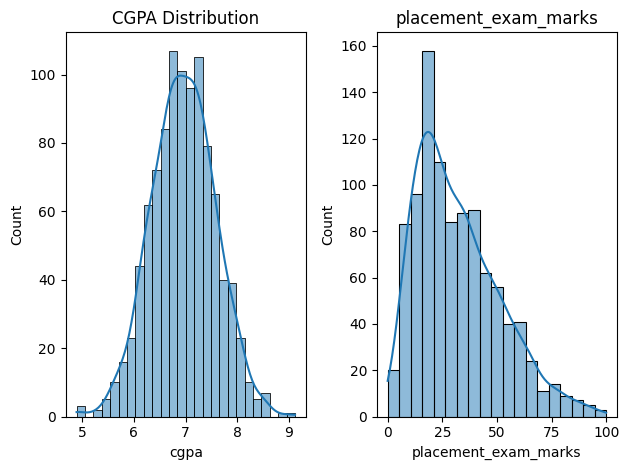

In [6]:
# Subplot 1: CGPA Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.title("CGPA Distribution")

# Subplot 2: IQ Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("placement_exam_marks")

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
print('Cgpa Mean ',df['cgpa'].mean())
print('Cgpa Standard Deviation ',df['cgpa'].std())
print('Cgpa Min ',df['cgpa'].min())
print('Cgpa Mx ',df['cgpa'].max())

Cgpa Mean  6.96124
Cgpa Standard Deviation  0.6158978751323894
Cgpa Min  4.89
Cgpa Mx  9.12


In [8]:
df['cgpa'].mean() + 3 * df['cgpa'].std()

8.808933625397168

In [9]:
# Finding the boundary values

#max = mean+3sigma
#min = mean - 3sigma
cgpa_max = df['cgpa'].mean() + (3 * df['cgpa'].std())
cgpa_min = df['cgpa'].mean() - (3 * df['cgpa'].std())
print('Maximum Allowed :', cgpa_max)
print('Minimum Allowed :', cgpa_min) 

Maximum Allowed : 8.808933625397168
Minimum Allowed : 5.113546374602832


In [10]:
# Finding the outliers
df[(df['cgpa']>8.8) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [11]:
new_df = df[(df['cgpa'] < 8.8) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Approach 2 Calculating the ZScore

ZScore = (Xi - mean)/std

In [12]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/(df['cgpa'].std())
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [15]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
new_df_trim = df[(df['cgpa_zscore']<3) & (df['cgpa_zscore'] > -3)]
new_df_trim

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [18]:
df['cgpa'] = np.where(df['cgpa']> cgpa_max, cgpa_max,np.where(df['cgpa'] < cgpa_min,cgpa_min, df['cgpa']))
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [19]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64